#### 3.5.3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- 장점
  - 클러스터 개수 지정 필요 없음
  - 데이터 포인트들의 복잡한 형상도 분석하여 클러스터링 가능
  - 어떠한 클러스터에도 속하지 않는 포인트도 구분 가능
  - 비교적 큰 데이터셋에도 적용가능<br/><br/>
- 주요 개념
  - Dense Region (밀집 지역)
    - 특성 공간에서 유사한 공간에 데이터가 많이 밀집되어 있는 지역
    - DBSCAN의 기본 아이디어: 클러스터 구성 기반으로서 데이터의 밀집 지역 활용
  - Core Sample (or Core Points, 핵심 샘플, 핵심 포인트)
    - 주요 매개변수: eps (기본값:0.5), min_samples (기본값:5)
    - 임의의 데이터 포인트 $p$에서 eps 거리 안에 min_samples 개수 만큼의 데이터 포인트가 들어 있으면 해당 $p$를 핵심 포인트포 분류하고 이들 데이터 포인트들을 동일한 클러스터로 병합함<br/><br/>

- 주요 데이터 포인트 정리 (from wikipedia)
  - A point $p$ is a core point if at least $min\_samples$ points are within distance $eps$ ($eps$ is the maximum radius of the neighborhood from $p$) of it (including $p$). 
  - Those points are said to be directly reachable from $p$.
  - A point $q$ is **directly reachable** from $p$ if point q is within distance $eps$ from point $p$ and $p$ must be a core point.
  - A point $q$ is **reachable** from $p$ if there is a path $p_1$, ..., $p_n$ with $p_1 = p$ and $p_n = q$, where each $p_{i+1}$ is directly reachable from $p_i$ (all the points on the path must be core points, with the possible exception of $q$).
  - All points not reachable from any other point are **outliers**.<br/><br/>
      
- 임의의 포인트는 다음과 같이 3개의 종류로 나뉨
  - Core Points
  - Boundary Points
    - 경계 포인트는 두 개 이상의 클러스터 핵심 포인트의 이웃일 수 있음.
    - 이러한 경우, 방문 순서에 의해 클러스터 소속이 결정됨.
    - 이러한 경계 포인트의 개수는 일반적으로 그렇게 많지 않음.
  - Noise (or Outlier) Points
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="50%"/>
  - Eample (see the above figure)
    - In the above diagram, $min\_samples$ = 4. 
    - Point $A$ and the other red points are core points, because the area surrounding these points in an $eps$ radius contain at least 4 points (including the point itself). 
    - Because they are all reachable from one another, they form a single cluster. 
    - Points $B$ and $C$ are not core points, but are reachable from $A$ (via other core points) and thus belong to the cluster as well (Point $B$ and $C$ are boundary points).
    - Point $N$ is a noise point that is neither a core point nor directly-reachable

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [3]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


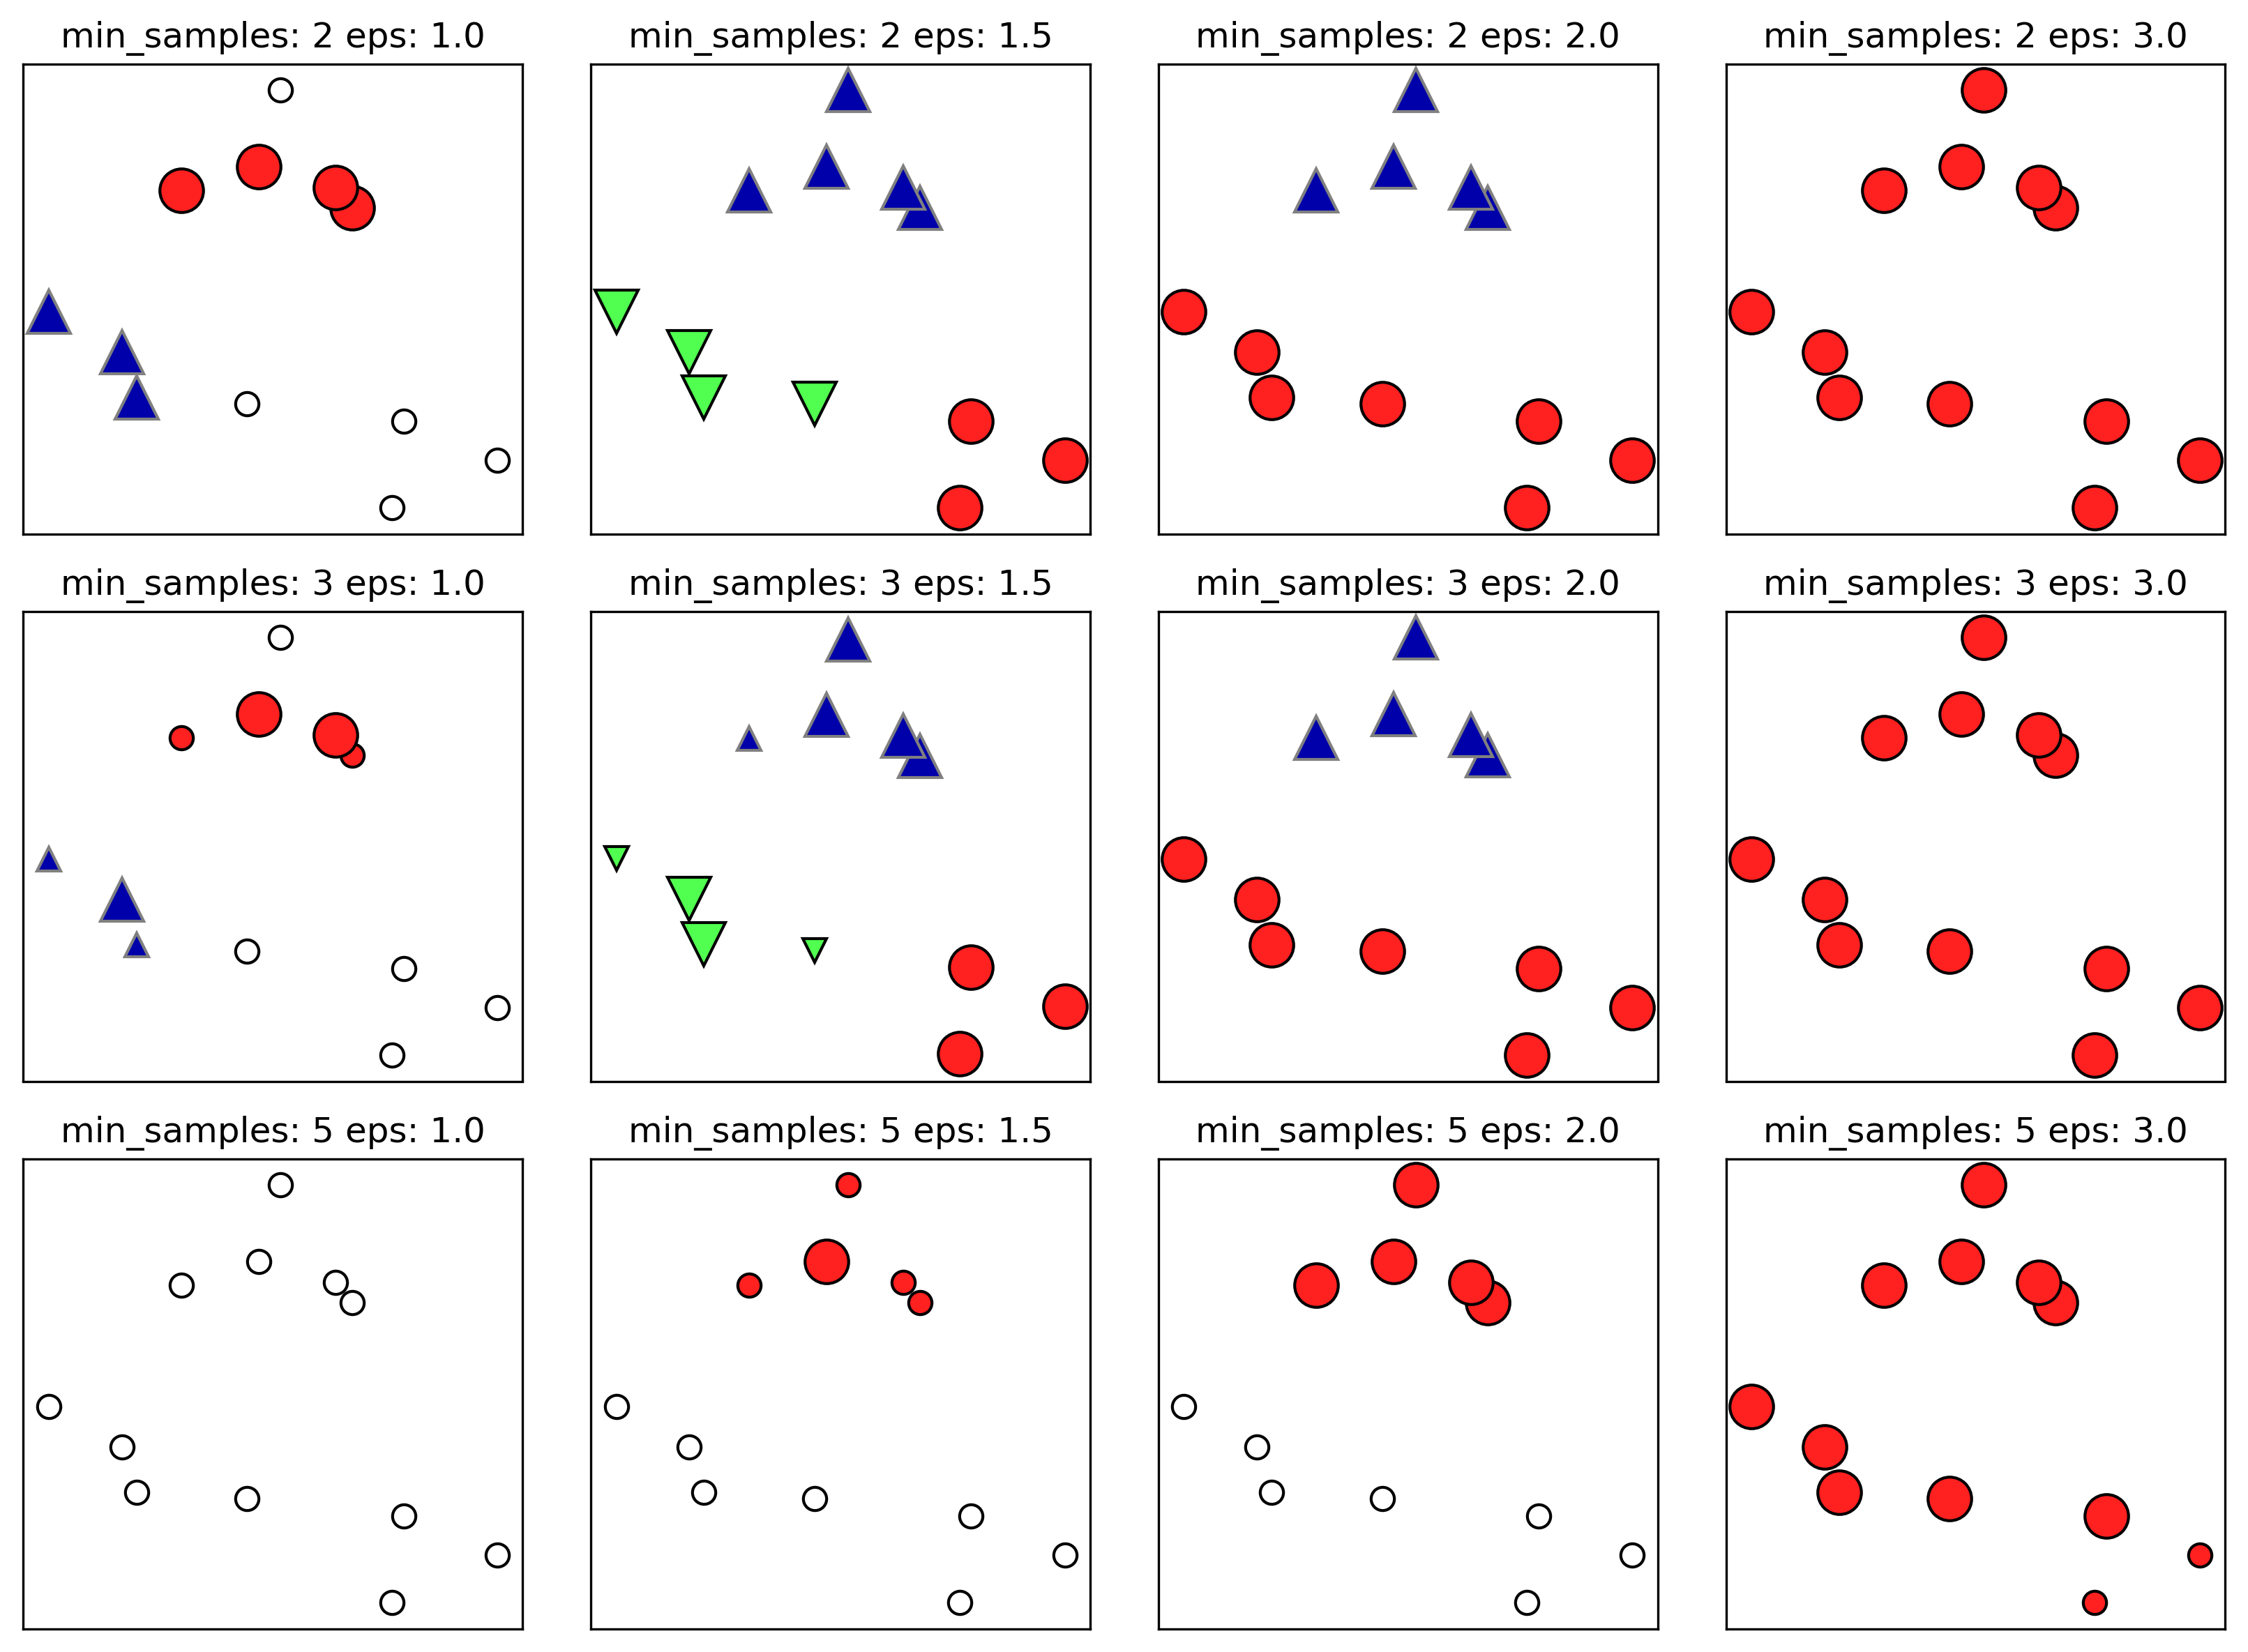

In [4]:
mglearn.plots.plot_dbscan()

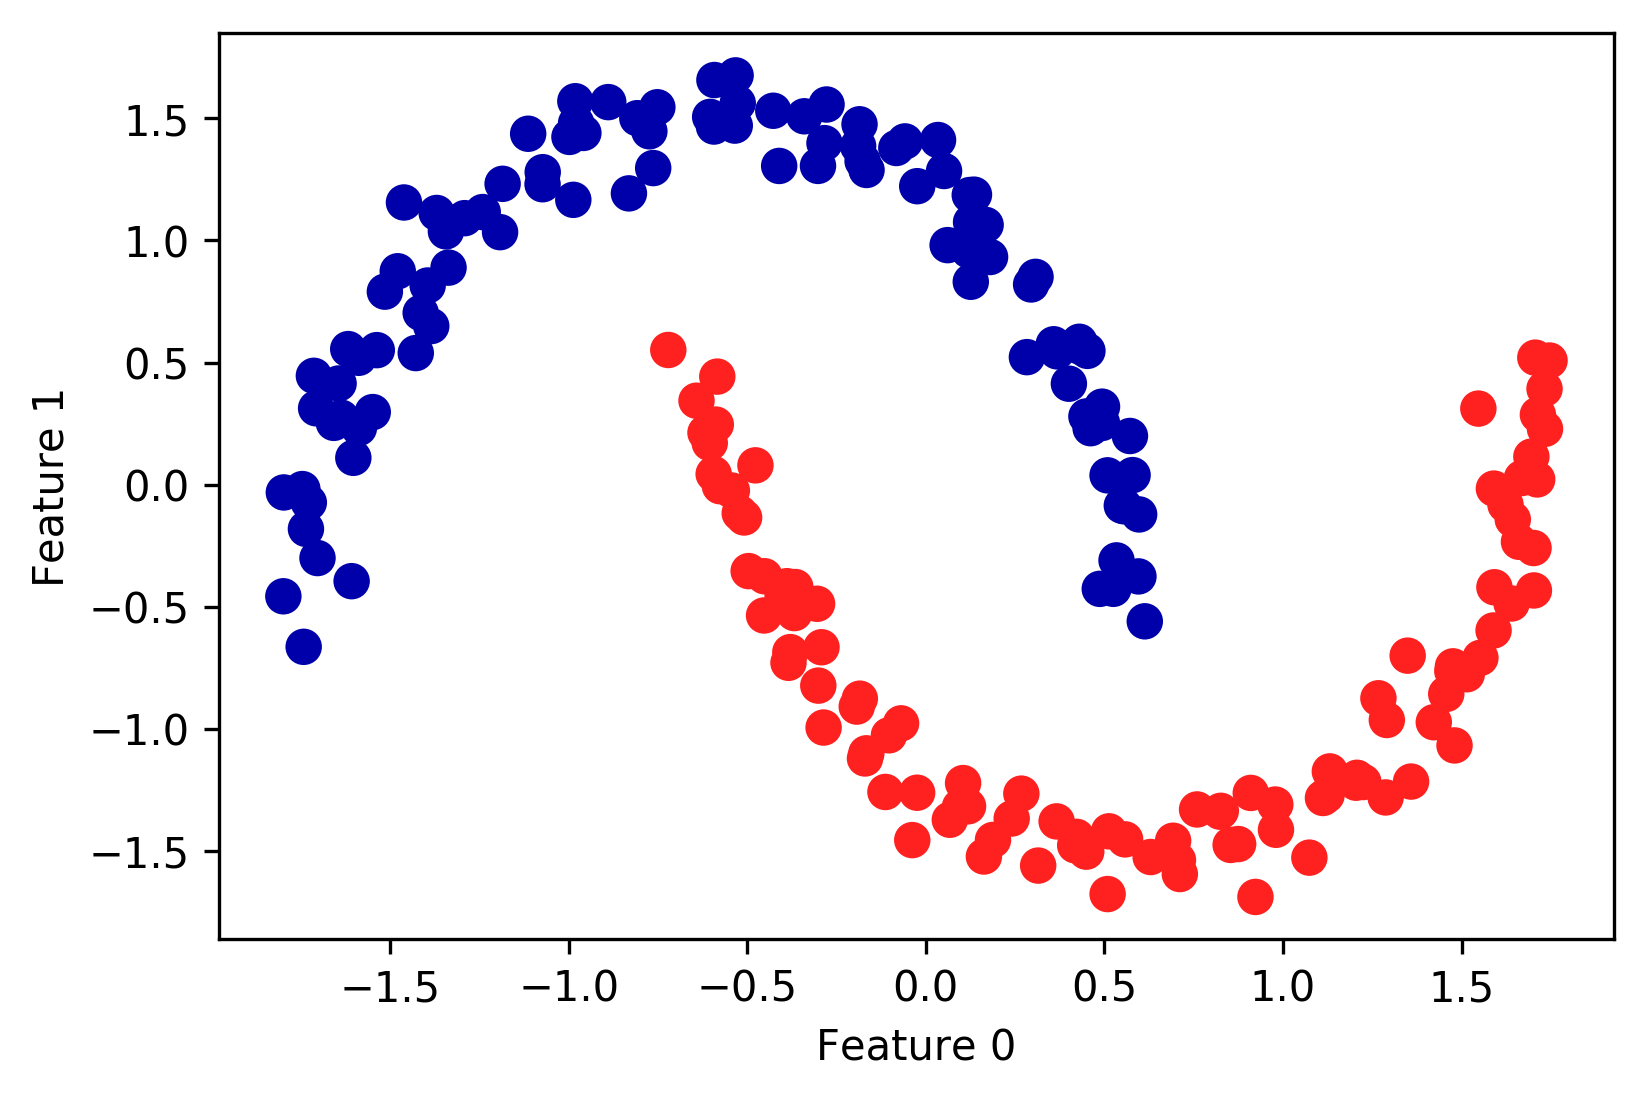

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")